**Importing Necessary Libraries**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import pickle

**Loading the Data**

In [3]:
data=pd.read_csv('gender_voice_dataset.csv')
data=pd.DataFrame(data)
data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402905,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


**Understanding our Data**

In [4]:
data.shape

(3168, 21)

We have 1 target vairable 'label' which has values either male or female and about 20 independent variables. Here is a breif description of each of them.

'meanfreq': Mean frequency of the voice audio of the person in kHz.

'sd': Standard Deviation of the frequency of the voice audio.

'median': Median frequency of the voice audio.

'Q25': First Quantile in kHz

'Q75': Third Quantile in kHz

'IQR': Interquantile range in kHz

'skew': Distortion or asymmetry that deviates from the symmetrical bell curve or normal distribution

'kurt': Statistical measure that defines how heavily the tails of a distribution differ from the tails of the normal distribution

'sp.ent': Spectral Entrpy

'sfm': Spectral Flatness

'mode': Mode Frequency

'centroid': Frequency Centroid (Specprop)

'meanfun': Mean fundamental frequency measured across acoustic goal

'minfun': Minimum fundamental frequency measured across acoustic goal

'maxfun': Maximum fundamental frequency measured across acoustic goal

'meandom': Mean of dominant frequency measured across acoustic goal

'mindom': Minimum of dominant frequency measured across acoustic goal

'maxdom': Maximum of dominant frequency measured across acoustic goal

'dfrange': Range of dominant frequency measured across acoustic goal

'modindx': Modulation Index



In [5]:
data.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [6]:
data.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


Normalizing the data is important as without it, the predictive power of the model will descrease.

<Axes: >

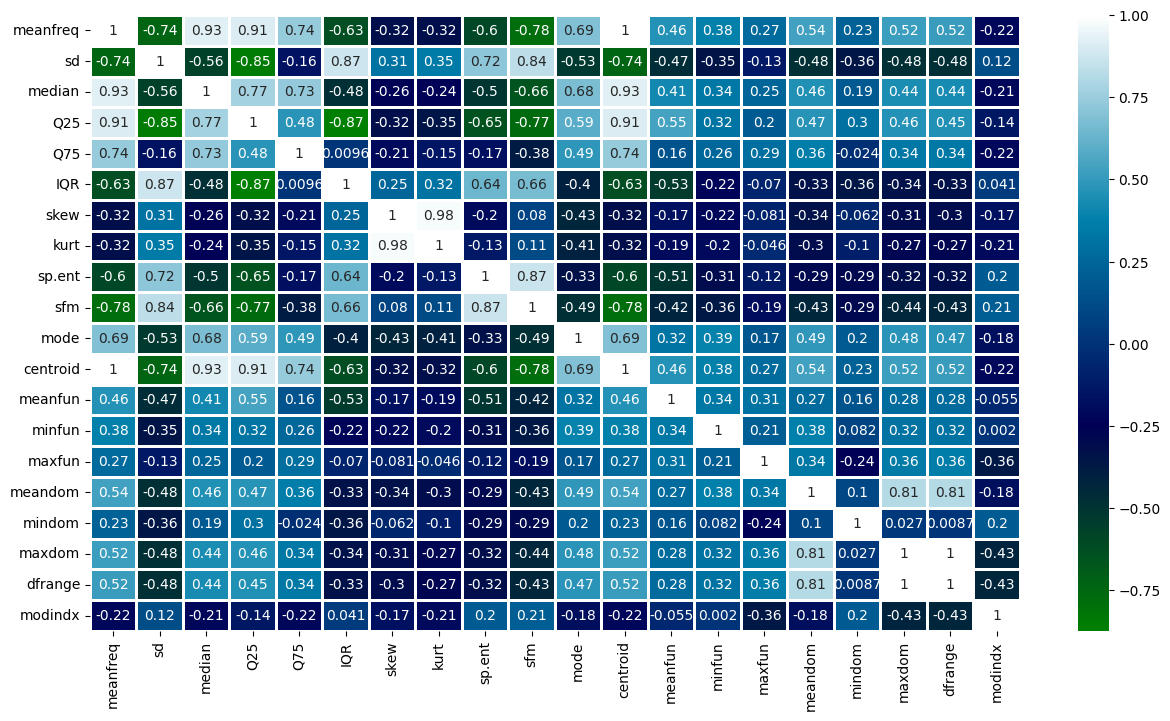

In [9]:
plt.figure(figsize=(15,8))
sns.heatmap(data.drop(['label'],axis=1).corr(), annot=True, cmap='ocean', linewidths=1)

We will be removing columns with high correlation either directly or inversely with another column as they wont help in model learning or generalizing the data. For example dfrange, kurt, centroid, sfm won't be needed further in our analysis.

**Plotting histograms**

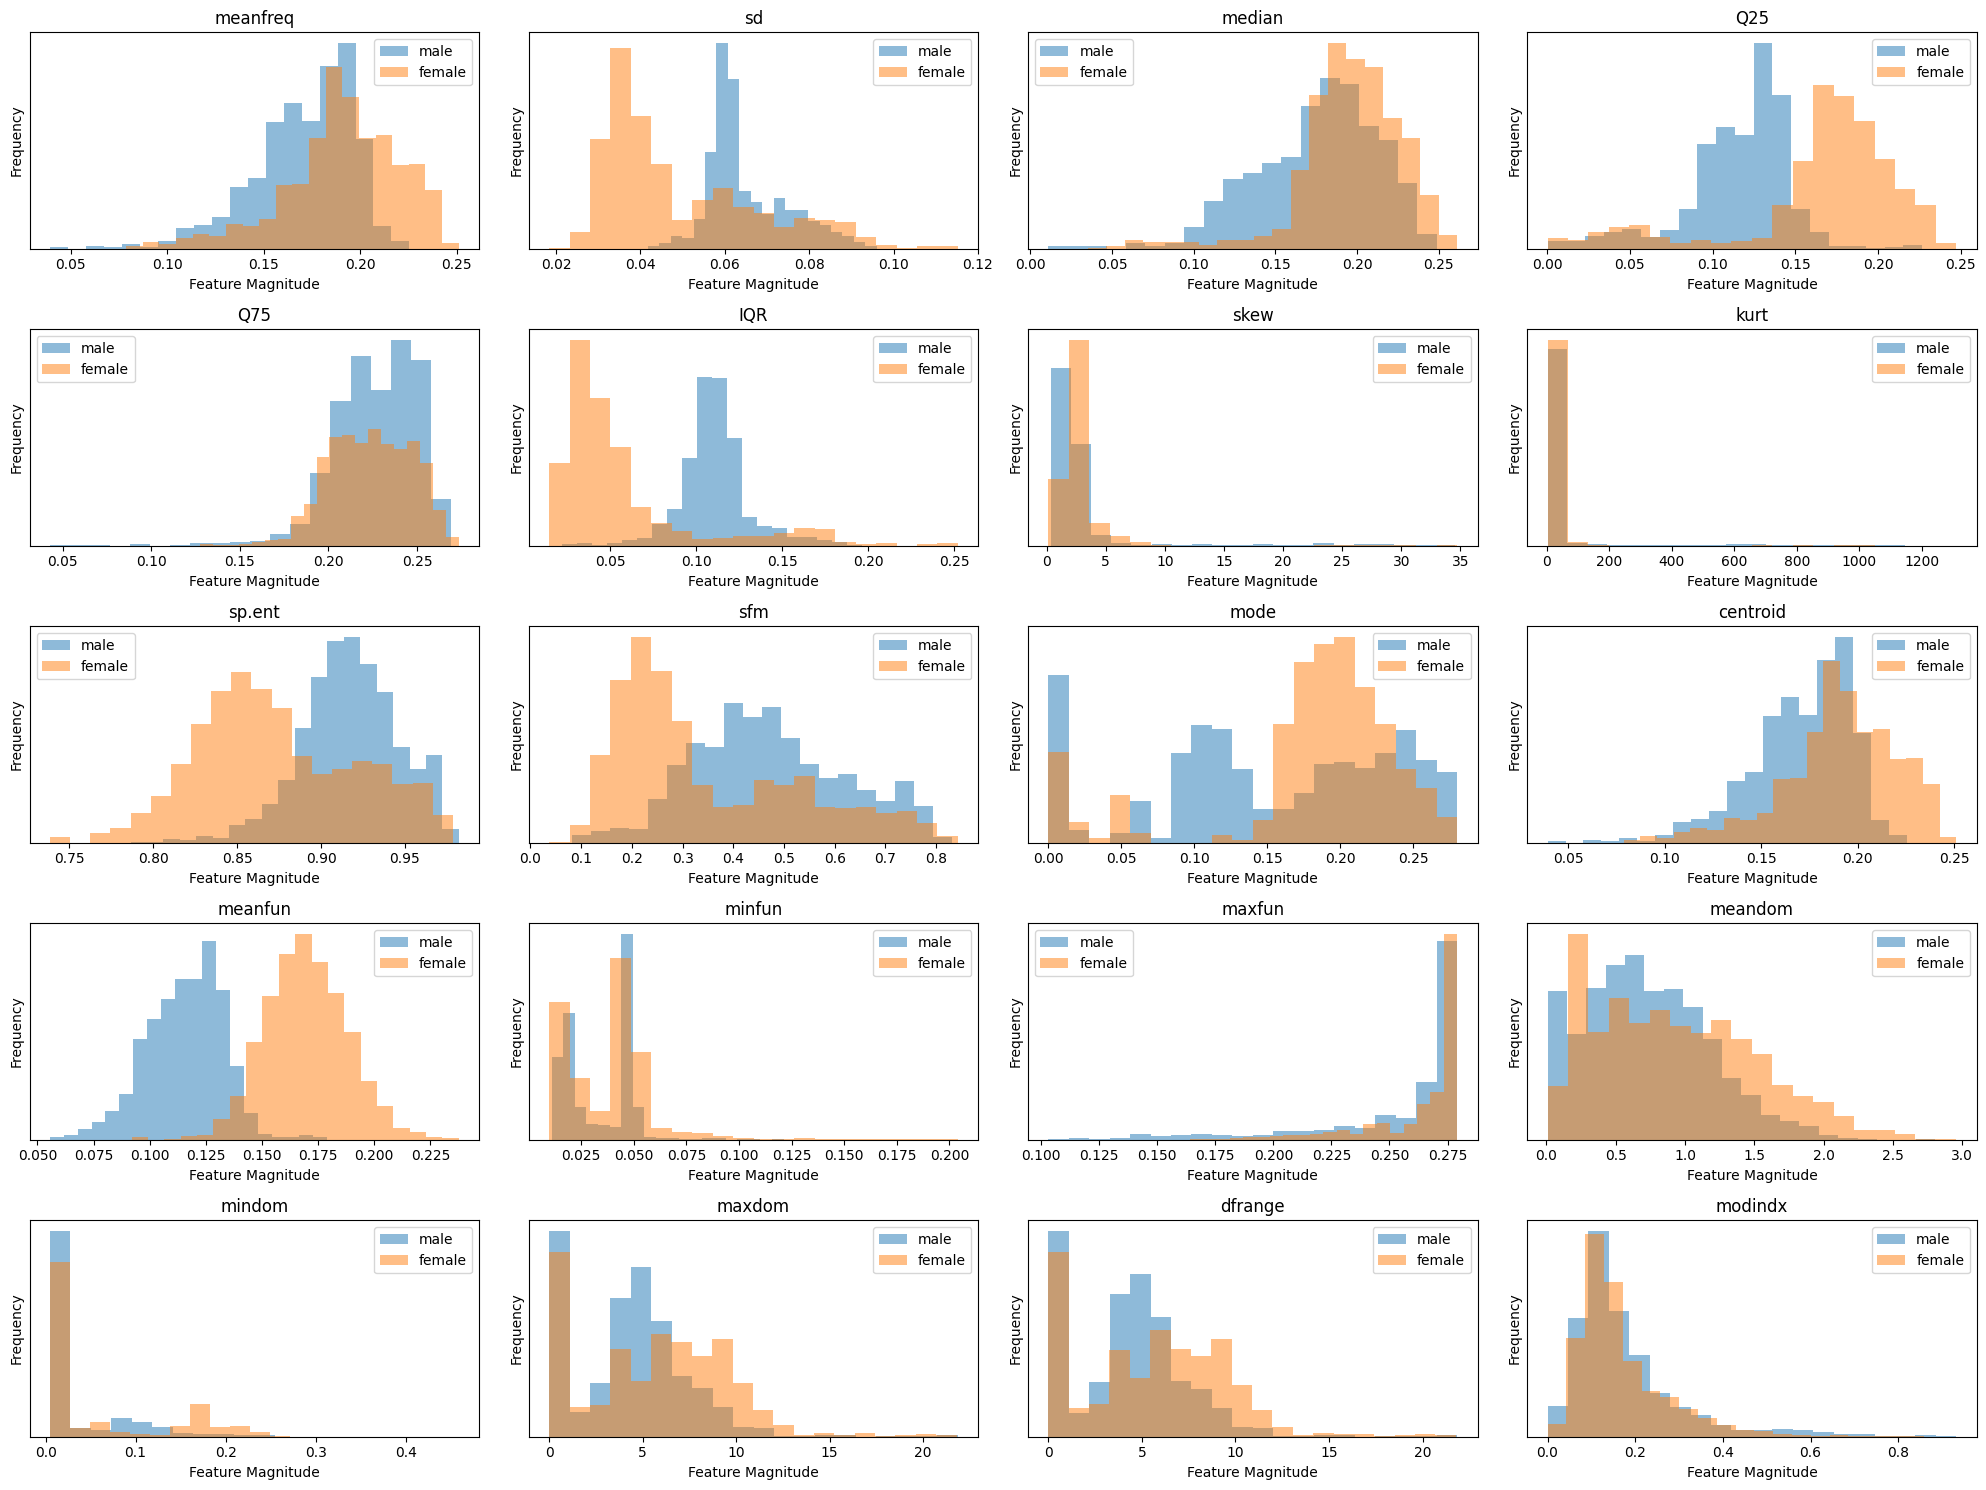

In [10]:
Male=data[data.label=='male']
Female=data[data.label=='female']
fig, axes = plt.subplots(5,4, figsize=(20,15))
ax = axes.ravel()
for i in range(20):
  ax[i].hist(Male.iloc[:,i], bins=20, alpha=0.5)
  ax[i].hist(Female.iloc[:,i], bins=20, alpha=0.5)
  ax[i].set_title(list(Male)[i])
  ax[i].set_yticks(())
  ax[i].set_xlabel("Feature Magnitude")
  ax[i].set_ylabel("Frequency")
  ax[i].legend(['male','female'],loc='best')
fig.tight_layout()

From the graphs above we can differentiate which features are able to define male and female voice seperately.

**Cleaning Data**

In [11]:
Data = data.drop(['dfrange','kurt','minfun','maxfun','meanfreq','meandom','modindx','centroid','sfm'], axis=1)

**Specifying Dependent and Independent Variables**

In [12]:
Data.columns

Index(['sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'sp.ent', 'mode',
       'meanfun', 'mindom', 'maxdom', 'label'],
      dtype='object')

In [13]:
Y=Data['label']
X=Data.drop(['label'],axis=1)

**Splitting the Dataset**

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=48)

**Fitting Support Vector Classifier Model**

In [15]:
Model= SVC().fit(X_train, Y_train)

**Evaluating our Model**

In [16]:
print("Support Vector Classifier")
print("Accuracy of train data: ", round((Model.score(X_train,Y_train)*100),2),'%')
print("Accuracy of test data: ", round((Model.score(X_test,Y_test)*100),2),'%')

Support Vector Classifier
Accuracy of train data:  72.18 %
Accuracy of test data:  73.97 %


**Fitting Random Forest Classifier Model**

In [17]:
ForestModel= RandomForestClassifier(n_estimators=100, random_state=42).fit(X_train,Y_train)

In [18]:
print("Random Forest Classifier")
print("Accuracy of train data: ", round((ForestModel.score(X_train,Y_train)*100),2),'%')
print("Accuracy of test data: ", round((ForestModel.score(X_test,Y_test)*100),2),'%')

Random Forest Classifier
Accuracy of train data:  100.0 %
Accuracy of test data:  97.32 %


**Saving Model to Disk**

In [19]:
filename= open("Gender_prediction.pickle", 'wb')

In [20]:
pickle.dump(ForestModel, filename)

In [21]:
filename= "Gender_prediction.pickle"
loaded_model= pickle.load(open(filename,'rb'))
result=loaded_model.score(X_test,Y_test)